In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [2]:
C=0.1 # Constant of correction
G=1 # Setting the gravitational constant to 1
m=1 # m << M
M=1000*m # Unit mass
r0=1 # Unit radius
alpha=0 # Starting angle
x=r0/1000 # Small starting displacement

In [3]:
v0=np.sqrt(C + G*M/r0**3)
wr=np.sqrt(4*C + G*M/r0**3)
v0x=v0*np.sin(alpha)+x*wr*np.cos(alpha)
v0y=-v0*np.cos(alpha)+x*wr*np.sin(alpha)
x0=r0*np.cos(alpha)
y0=r0*np.sin(alpha)

In [4]:
def Fx(x,y): # Acceleration in the x direction
    r=np.sqrt(x**2+y**2)
    CGM = C + G*M/r**3
    Fx_ret=-m*x*CGM
    return Fx_ret

def Fy(x,y): # Acceleration in the y direction
    r=np.sqrt(x**2+y**2)
    CGM = C + G*M/r**3
    Fy_ret=-m*y*CGM
    return Fy_ret

In [5]:
def calc_regz(phi):
    return r0

def calc_xegz(phi):
    x_ret=calc_regz(phi)*np.cos(phi)
    return x_ret

def calc_yegz(phi):
    y_ret=calc_regz(phi)*np.sin(phi)
    return y_ret



In [6]:
# We want at least 10 orbits, so we set Tmax >> 10*T
Tmax=10*2*np.pi/np.sqrt(C+G*M/r0**3)
dt=Tmax/1000000
t=np.arange(0.0,Tmax+dt,dt)
npts=len(t)

def func(P,t):
    x=P[0]
    y=P[2]
    return[P[1],Fx(x,y)/m,P[3],Fy(x,y)/m]

P0 = [x0,v0x,y0,v0y]

y=odeint(func,P0,t)

In [7]:
phi=np.arange(3*np.pi/2,-5*np.pi/2,-np.pi/4) #dot(phi) is negative
xegz = calc_xegz(phi)
yegz = calc_yegz(phi)

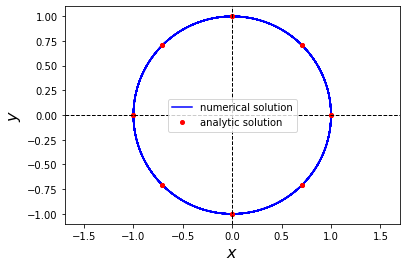

In [16]:
fig1=plt.figure(1)
plt.plot(y[:,0],y[:,2],color='b',ls='-',lw=1.5)
plt.plot(xegz,yegz,'o',color='r',markersize=4)
plt.legend(["numerical solution","analytic solution"])
plt.xlabel(r'$x$',fontsize=16)
plt.ylabel(r'$y$',fontsize=16)
plt.axhline(y=0,color='k',lw=1,ls='--')
plt.axvline(x=0,color='k',lw=1,ls='--')
plt.axis('equal')
fig1.savefig("plot1.png", dpi=600)

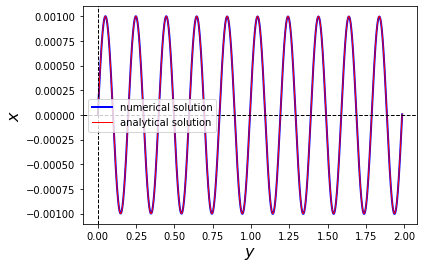

In [17]:
fig2=plt.figure(2)
plt.plot(t,np.sqrt(y[:,0]**2 + y[:,2]**2)-r0,color='b',ls='-',lw=2)
plt.plot(t,x*r0*np.sin(wr*t),color='r', lw=1)
plt.legend(["numerical solution","analytical solution"])
plt.xlabel(r'$y$',fontsize=16)
plt.ylabel(r'$x$',fontsize=16)
plt.axhline(y=0,color='k',lw=1,ls='--')
plt.axvline(x=0,color='k',lw=1,ls='--')
fig2.savefig("plot2.png", dpi=600)